In [46]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
digits = load_digits()
x = digits.data
y = digits.target

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [53]:
clf = DecisionTreeClassifier(random_state=42)
score = cross_val_score(clf, x, y, cv=10)
print(score.mean())

with open("submissions/rf_answer1.txt", "w") as fout:
    fout.write(str(score.mean()))

0.837085080214


In [24]:
from sklearn.ensemble import BaggingClassifier

In [54]:
clf = BaggingClassifier(n_estimators=100)
score = cross_val_score(clf, x, y, cv=10)
print(score.mean())

with open("submissions/rf_answer2.txt", "w") as fout:
    fout.write(str(score.mean()))

0.922126267867


In [55]:
clf = BaggingClassifier(n_estimators=100, max_features=int(np.sqrt(x.shape[1])))
score = cross_val_score(clf, x, y, cv=10)
print(score.mean())

with open("submissions/rf_answer3.txt", "w") as fout:
    fout.write(str(score.mean()))

0.933159837506


In [56]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features=int(np.sqrt(x.shape[1]))),n_estimators=100)
score = cross_val_score(clf, x, y, cv=10)
print(score.mean())

with open("submissions/rf_answer4.txt", "w") as fout:
    fout.write(str(score.mean()))

0.950516819581


In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
score = cross_val_score(clf, x, y, cv=10)
print(score.mean())

0.953907174948


[0.75098649905888704, 0.87707419916031859, 0.91435003049923558, 0.92883402089595157, 0.95274719668607355, 0.95332019724214534, 0.95335346586411518, 0.95227001441027892, 0.94776864126386329]


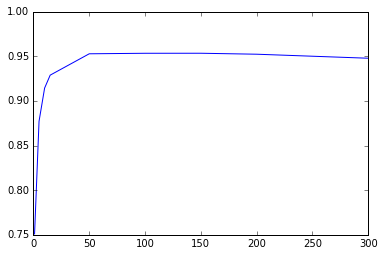

In [47]:
num_estimators = [1,5,10,15,50,100,150,200,300]
scores = []
for num in num_estimators:
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=num), x, y, cv=10).mean())
    
print(scores)
plt.plot(num_estimators, scores)

[0.95278085412432334, 0.94778426157732765, 0.94947023895423965, 0.94671361609595783, 0.94779971426882315, 0.94275566419797185, 0.94606347540090696, 0.94327505512624743, 0.93933348701691499, 0.93271307834332939, 0.93386750989593703]


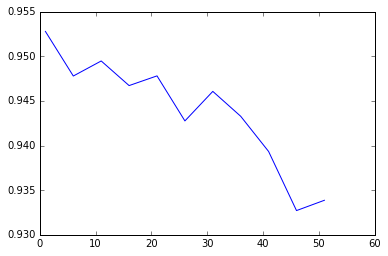

In [50]:
num_features = np.arange(1, 56, 5)
scores = []
for num in num_features:
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=100, max_features=num), x, y, cv=10).mean())
    
print(scores)
plt.plot(num_features, scores)

[0.6994376401896909, 0.79615810962643252, 0.84618998437530701, 0.8925594894415747, 0.91034816327068313, 0.92875299786886478, 0.93657435377289722, 0.94381768169880986, 0.94492358059777337, 0.95279755799616039, 0.94939756155503918, 0.95442833904255386, 0.94943175945485903, 0.94992953454371831, 0.9538818217879006, 0.9516716434833743, 0.95166301311173118, 0.95389778371730194, 0.95056162091684393]


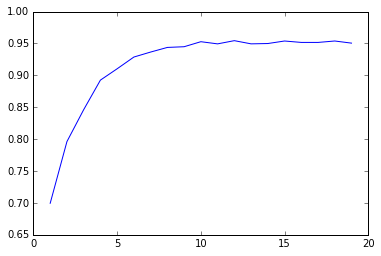

In [51]:
max_depth = np.arange(1, 20)
scores = []
for num in max_depth:
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=num), x, y, cv=10).mean())
    
print(scores)
plt.plot(max_depth, scores)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [57]:
with open("submissions/rf_answer5.txt", "w") as fout:
    fout.write("2 3 4 7")